# Image Classification


In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
import os
import imghdr
import matplotlib.pyplot as plt

In [4]:
data_dir = "Datasets"

In [5]:
image_extentions = ["jpeg","jpg","png","bmp"]

In [6]:
for images in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, images)):
        image_path = os.path.join(data_dir,images,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extentions:
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
    
  

In [7]:
img = cv2.imread(r"Datasets\cars\806tr3a_1586569.jpg")

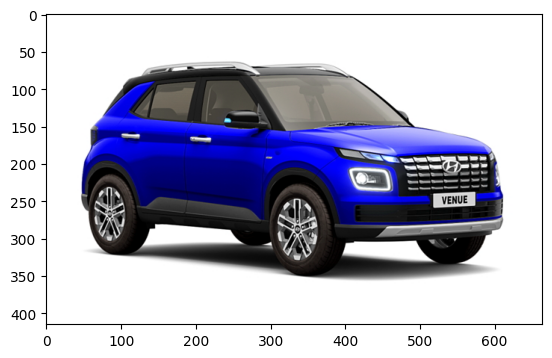

In [8]:
plt.imshow(img)

In [9]:
img.shape

(415, 664, 3)

## Loading Images

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [11]:
data = tf.keras.utils.image_dataset_from_directory("Datasets",image_size=(224,224),batch_size=5)

Found 1132 files belonging to 3 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch[1]

array([1, 2, 1, 0, 2])

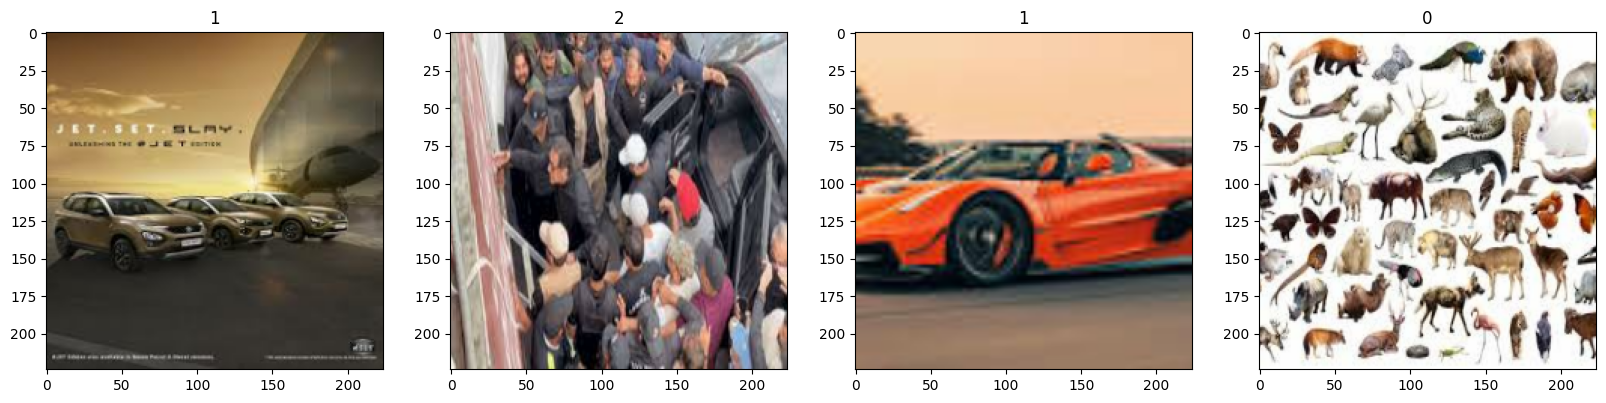

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## Data prepocessing

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()[0].max()

1.0

### Spliting Data

In [18]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.1)+2
val_size = int(len(data)*.2)

In [19]:
train_size+val_size+test_size == len(data)

True

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Softmax
import tensorflow as tf

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(1e-3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu',  kernel_regularizer = tf.keras.regularizers.L2(1e-3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu',  kernel_regularizer = tf.keras.regularizers.L2(1e-3)))
model.add(Dense(3,activation = "softmax"))

In [40]:
model.compile("adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 16)      

In [42]:
logdir = "logs"

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [44]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
158/158 [==============================] - 9s 54ms/step - loss: 1.3021 - accuracy: 0.4734 - val_loss: 1.1694 - val_accuracy: 0.5644
Epoch 2/20
158/158 [==============================] - 9s 54ms/step - loss: 0.9895 - accuracy: 0.6608 - val_loss: 1.0060 - val_accuracy: 0.6267
Epoch 3/20
158/158 [==============================] - 9s 54ms/step - loss: 0.7228 - accuracy: 0.7722 - val_loss: 0.9889 - val_accuracy: 0.6533
Epoch 4/20
158/158 [==============================] - 9s 55ms/step - loss: 0.6271 - accuracy: 0.8152 - val_loss: 0.9935 - val_accuracy: 0.6800
Epoch 5/20
158/158 [==============================] - 9s 56ms/step - loss: 0.5330 - accuracy: 0.8696 - val_loss: 1.0225 - val_accuracy: 0.6844
Epoch 6/20
158/158 [==============================] - 9s 58ms/step - loss: 0.4173 - accuracy: 0.9203 - val_loss: 1.0638 - val_accuracy: 0.7156
Epoch 7/20
158/158 [==============================] - 9s 57ms/step - loss: 0.4159 - accuracy: 0.9253 - val_loss: 1.2406 - val_accuracy: 0.7111

## Plotting Performance

In [45]:
hist.history

{'loss': [1.3021289110183716,
  0.9895302057266235,
  0.7228010296821594,
  0.6271296739578247,
  0.5329530239105225,
  0.41732293367385864,
  0.4159083366394043,
  0.4349296987056732,
  0.31538572907447815,
  0.28568750619888306,
  0.3198930621147156,
  0.4203908443450928,
  0.2958187460899353,
  0.30298319458961487,
  0.25924792885780334,
  0.3125191926956177,
  0.27326616644859314,
  0.20816680788993835,
  0.2581334114074707,
  0.2749536335468292],
 'accuracy': [0.473417729139328,
  0.6607595086097717,
  0.7721518874168396,
  0.8151898980140686,
  0.8696202635765076,
  0.9202531576156616,
  0.9253164529800415,
  0.9278481006622314,
  0.9632911682128906,
  0.9721518754959106,
  0.9582278728485107,
  0.9443038105964661,
  0.9746835231781006,
  0.9632911682128906,
  0.9721518754959106,
  0.9696202278137207,
  0.9810126423835754,
  0.9886075854301453,
  0.9696202278137207,
  0.9746835231781006],
 'val_loss': [1.1693834066390991,
  1.0059850215911865,
  0.9888988733291626,
  0.9935225844

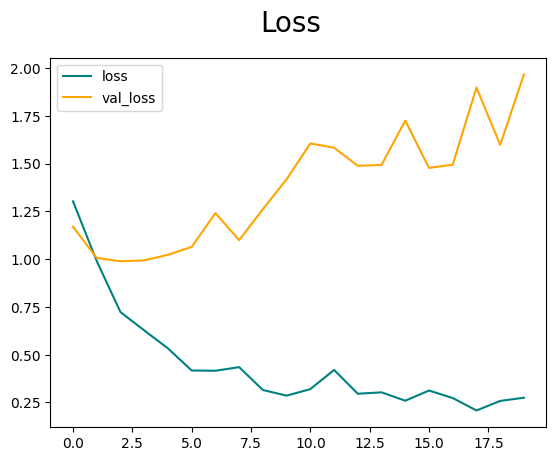

In [46]:
fig = plt.figure()
plt.plot(hist.history["loss"], color = 'teal',label = "loss")
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

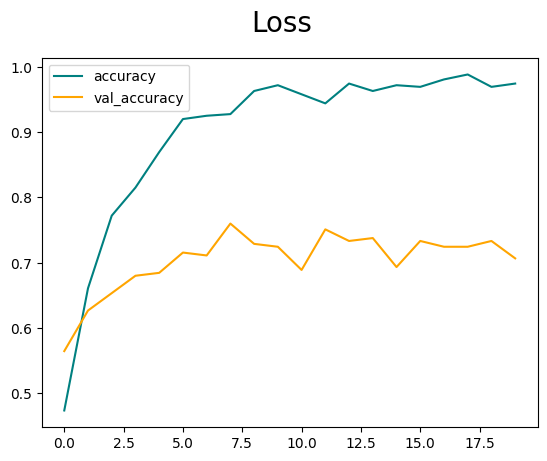

In [47]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color = 'teal',label = "accuracy")
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show() 

## Evaluate

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = []
    yhat_p = model.predict(X)
    for i in yhat_p:
        for j in range (len(i)):
            if i[j] == max(i):
                yhat.append(j)
    print(y, yhat)
    
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step
[0 2 2 2 0] [0, 2, 2, 2, 2]
1/1 [==============================] - 0s 33ms/step
[1 1 0 2 1] [1, 2, 2, 2, 2]
1/1 [==============================] - 0s 32ms/step
[2 0 0 0 0] [2, 2, 0, 0, 2]
1/1 [==============================] - 0s 31ms/step
[0 2 2 0 0] [2, 0, 2, 2, 0]
1/1 [==============================] - 0s 29ms/step
[0 1 0 2 0] [2, 1, 2, 2, 2]
1/1 [==============================] - 0s 43ms/step
[0 2 1 0 2] [0, 2, 2, 0, 0]
1/1 [==============================] - 0s 22ms/step
[2 2 1 0 0] [2, 2, 1, 0, 2]
1/1 [==============================] - 0s 48ms/step
[0 2 0 2 2] [2, 2, 0, 2, 2]
1/1 [==============================] - 0s 48ms/step
[2 2 0 1 0] [2, 0, 2, 1, 0]
1/1 [==============================] - 0s 52ms/step
[0 0 1 0 2] [2, 2, 1, 2, 2]
1/1 [==============================] - 0s 58ms/step
[2 2 2 2 0] [2, 2, 0, 0, 2]
1/1 [==============================] - 0s 27ms/step
[2 0 0 2 0] [2, 0, 2, 2, 2]
1/1 [==============================] - 0

In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.69135803, shape=(), dtype=float32) tf.Tensor(0.8115942, shape=(), dtype=float32) tf.Tensor(0.33333334, shape=(), dtype=float32)


## Test

In [59]:
import cv2

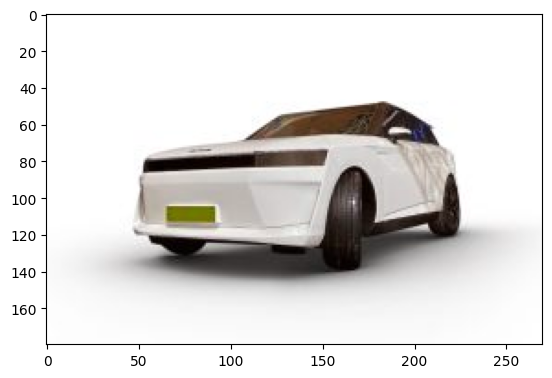

In [64]:
img = cv2.imread('Datasets/cars/defy_270x180.jpg')
plt.imshow(img)
plt.show()

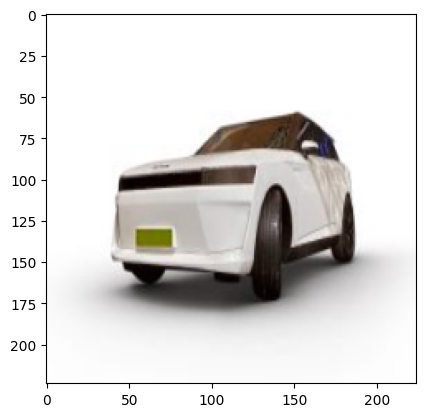

In [65]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [67]:
yhat

array([[5.6386931e-04, 9.9569774e-01, 3.7383612e-03]], dtype=float32)

In [75]:
if yhat[0][0] ==  max(yhat[0]):
    print("Its animal")
elif yhat[0][1] ==  max(yhat[0]):
    print("Its a Car")
elif yhat[0][2] ==  max(yhat[0]):
    print("Its a Human")


Its a Car


## Saving model

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save(os.path.join('Deep_learning_models','imageclassifier.h5'))

In [79]:
new_model = load_model('Deep_learning_models//imageclassifier.h5')


In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [82]:
if yhat[0][0] ==  max(yhat[0]):
    print("Its animal")
elif yhat[0][1] ==  max(yhat[0]):
    print("Its a Car")
elif yhat[0][2] ==  max(yhat[0]):
    print("Its a Human")


Its a Car
